In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading in track metadata with genre labels
tracks = pd.read_csv('datasets/fma-rock-vs-hiphop.csv')

In [3]:
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
# Reading in track metrics with the features
echonest_metrics = pd.read_json('datasets/echonest-metrics.json',precise_float =True)

In [5]:
echonest_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
10,145,0.235506,0.438672,0.487752,0.716122,0.070359,0.047298,120.790,0.650452
100,341,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707
1000,3457,0.081256,0.897197,0.367886,0.104474,0.085845,0.041271,100.744,0.749293


In [6]:
# Merging the relevant columns of tracks and echonest_metrics
echo_tracks = echonest_metrics.merge(tracks[['track_id','genre_top']])

In [7]:
# Inspecting the resultant dataframe
echo_tracks.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
track_id            4802 non-null int64
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
genre_top           4802 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [8]:
echo_tracks.head(5)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,341,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707,Rock
3,46204,0.953349,0.498525,0.552503,0.924391,0.684914,0.028885,78.958,0.430448,Rock
4,46205,0.613229,0.500320,0.487992,0.936811,0.637750,0.030327,112.667,0.824749,Rock


In [9]:
echo_tracks.tail()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
4797,46145,0.309978,0.509197,0.694164,0.901890,0.111435,0.033031,157.834,0.806165,Rock
4798,46146,0.807148,0.662437,0.695801,0.870190,0.290546,0.041281,119.047,0.620546,Rock
4799,46147,0.046950,0.660372,0.618403,0.893065,0.082421,0.030746,137.023,0.497032,Rock
4800,46148,0.188371,0.501633,0.900665,0.875925,0.098730,0.041440,125.060,0.834851,Rock
4801,46149,0.148685,0.622571,0.496510,0.822425,0.087282,0.038762,120.028,0.258213,Rock


In [10]:
echo_tracks.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


In [11]:
echo_tracks.columns

Index(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'genre_top'],
      dtype='object')

In [12]:
echo_tracks.isnull().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
dtype: int64

In [13]:
display(echo_tracks["genre_top"].value_counts())

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

In [14]:
# Creating a correlation matrix
corr_metrics = echo_tracks.corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1,-0.372282,0.0494541,0.140703,-0.275623,0.0482307,-0.0269951,-0.0253918,0.0100698
acousticness,-0.372282,1,-0.0289537,-0.281619,0.19478,-0.0199914,0.072204,-0.0263097,-0.0138406
danceability,0.0494541,-0.0289537,1,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1,0.0282377,0.113331,-0.109983,0.195227,0.0386027
instrumentalness,-0.275623,0.19478,-0.255217,0.0282377,1,-0.0910218,-0.366762,0.022215,-0.219967
liveness,0.0482307,-0.0199914,-0.106584,0.113331,-0.0910218,1,0.0411725,0.00273169,-0.0450931
speechiness,-0.0269951,0.072204,0.276206,-0.109983,-0.366762,0.0411725,1,0.00824055,0.149894
tempo,-0.0253918,-0.0263097,-0.242089,0.195227,0.022215,0.00273169,0.00824055,1,0.0522212
valence,0.0100698,-0.0138406,0.473165,0.0386027,-0.219967,-0.0450931,0.149894,0.0522212,1


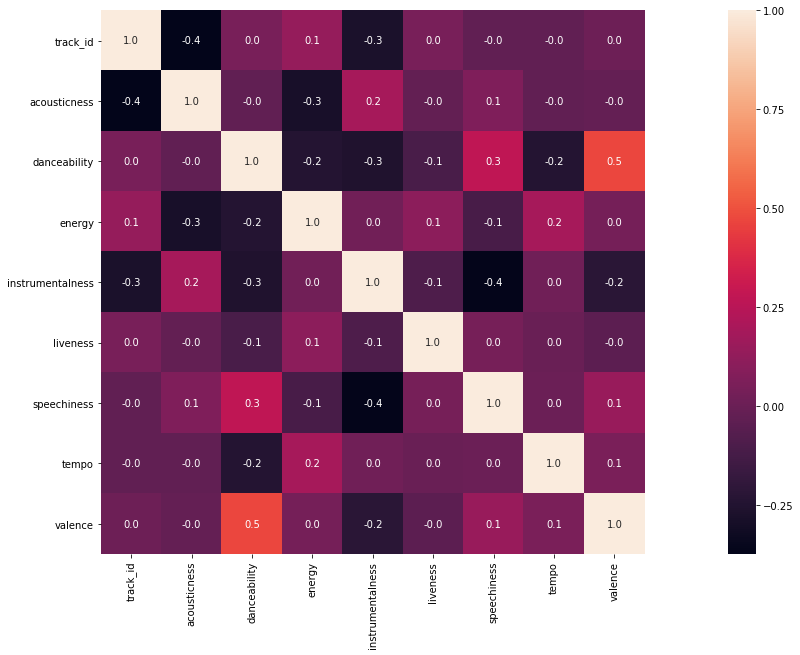

In [15]:
#heat map
plt.subplots(figsize=(30,10))
sns.heatmap( corr_metrics, square=True, annot=True, fmt=".1f" )

In [16]:
echo_tracks.drop(["track_id"], axis=1).describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


In [17]:
# Defining our features 
features = echo_tracks.drop(columns=['genre_top','track_id'],axis=1)

# Defining our labels
labels = echo_tracks['genre_top']


In [18]:
labels.head()

0    Hip-Hop
1    Hip-Hop
2       Rock
3       Rock
4       Rock
Name: genre_top, dtype: object

In [19]:
#Feature Scaling
#Scaling the features and setting the values to new variable

# Importing the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scaling the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)
pd.DataFrame(features).head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707
3,0.953349,0.498525,0.552503,0.924391,0.684914,0.028885,78.958,0.430448
4,0.613229,0.500320,0.487992,0.936811,0.637750,0.030327,112.667,0.824749


Text(0.5,0,'Principal Component #')

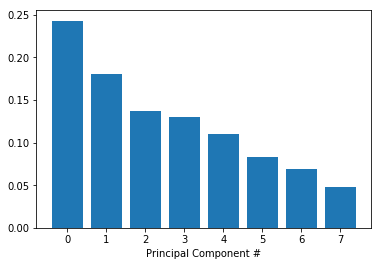

In [20]:
# Import the PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

In [21]:
#unfortunately, there does not appear to be a clear elbow in this scree plot

In [22]:
#we can also look at the cumulative explained variance plot
#to determine how many features are required to explain, say, about 90% of the variance 

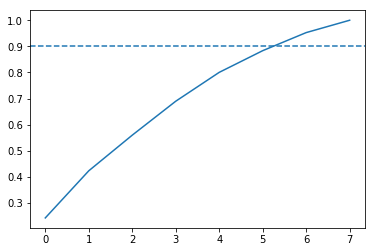

In [23]:
# Calculating the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)
#print(cum_exp_variance)

# Ploting the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
#print(cum_exp_variance)
ax.plot(range(8),cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
n_components = 6

#Performing PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [24]:
# Importing train_test_split function 
from sklearn.model_selection import train_test_split

# Splitting our data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels,random_state=10)

In [25]:
#Importing the Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features,train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_features)

In [26]:
# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# Training our logistic regression and predicting labels for the test set
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features,train_labels)
pred_labels_logit = logreg.predict(test_features)

In [27]:
# Creating the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels,pred_labels_tree)
class_rep_log = classification_report(test_labels,pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
              precision    recall  f1-score   support

    Hip-Hop       0.66      0.66      0.66       229
       Rock       0.92      0.92      0.92       972

avg / total       0.87      0.87      0.87      1201

Logistic Regression: 
              precision    recall  f1-score   support

    Hip-Hop       0.75      0.57      0.65       229
       Rock       0.90      0.95      0.93       972

avg / total       0.87      0.88      0.87      1201



In [28]:
#looking at our classification report, we can see that rock songs are fairly well classified
#but hip-hop songs are disproportionately misclassified as rock songs. 

In [29]:
display(echo_tracks["genre_top"].value_counts())

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

In [30]:
# Subset only the hip-hop tracks, and then only the rock tracks
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

# sample the rocks songs to be the same number as there are hip-hop songs
rock_only = rock_only.sample(n=hop_only.shape[0], random_state=10)

# concatenate the dataframes rock_only and hop_only
rock_hop_bal = pd.concat([rock_only, hop_only])

# The features, labels, and pca projection are created for the balanced dataframe
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, 
                                                                            random_state=10)

In [31]:
from sklearn.metrics import confusion_matrix
genres = ['Hip-Hop','Rock']

Decision Tree: 



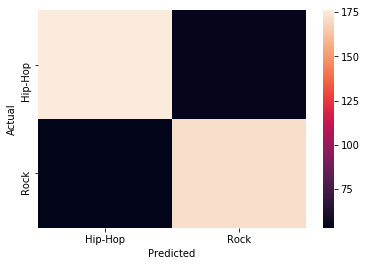

             precision    recall  f1-score   support

    Hip-Hop       0.77      0.77      0.77       230
       Rock       0.76      0.76      0.76       225

avg / total       0.76      0.76      0.76       455



In [32]:
# Training our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features,train_labels)
pred_labels_tree = tree.predict(test_features)

print("Decision Tree: \n")
#print(confusion_matrix(test_labels, pred_labels_tree))
sns.heatmap(confusion_matrix(test_labels, pred_labels_tree),xticklabels=genres,yticklabels=genres)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Creating classification report
print(classification_report(test_labels,pred_labels_tree))

Logistic Regression: 



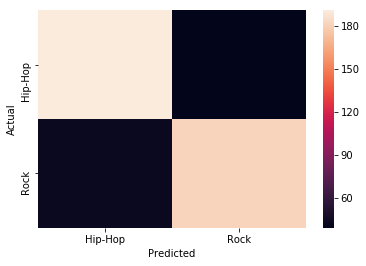

             precision    recall  f1-score   support

    Hip-Hop       0.82      0.83      0.82       230
       Rock       0.82      0.81      0.82       225

avg / total       0.82      0.82      0.82       455



In [33]:
# Training our logistic regression on the balanced data
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features,train_labels)
pred_labels_logit = logreg.predict(test_features)

print("Logistic Regression: \n")
#print(confusion_matrix(test_labels, pred_labels_tree))
sns.heatmap(confusion_matrix(test_labels, pred_labels_logit),xticklabels=genres,yticklabels=genres)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Creating classification report
print(classification_report(test_labels,pred_labels_logit))

Random Forest: 



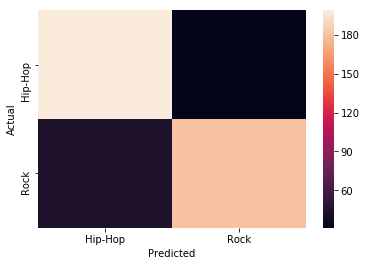

             precision    recall  f1-score   support

    Hip-Hop       0.82      0.87      0.84       230
       Rock       0.85      0.80      0.83       225

avg / total       0.84      0.84      0.83       455



In [34]:
from sklearn.ensemble import RandomForestClassifier

# Training our random forest classifier on the balanced data
rfc = RandomForestClassifier(random_state=10)
rfc.fit(train_features,train_labels)
pred_labels_rfc = rfc.predict(test_features)

print("Random Forest: \n")
#print(confusion_matrix(test_labels, pred_labels_tree))
sns.heatmap(confusion_matrix(test_labels, pred_labels_rfc),xticklabels=genres,yticklabels=genres)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Creating classification report
print(classification_report(test_labels,pred_labels_rfc))

Support Vector Machine: 



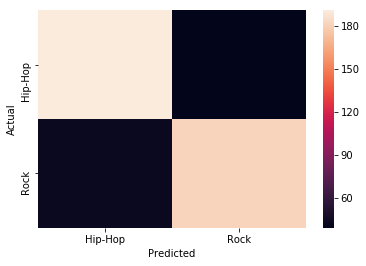

             precision    recall  f1-score   support

    Hip-Hop       0.87      0.88      0.87       230
       Rock       0.87      0.87      0.87       225

avg / total       0.87      0.87      0.87       455



In [35]:
from sklearn.svm import SVC

# Training our support vector machine on the balanced data
svm = SVC(random_state=10)
svm.fit(train_features,train_labels)
pred_labels_svm = svm.predict(test_features)

print("Support Vector Machine: \n")
#print(confusion_matrix(test_labels, pred_labels_tree))
sns.heatmap(confusion_matrix(test_labels, pred_labels_logit),xticklabels=genres,yticklabels=genres)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Creating classification report
print(classification_report(test_labels,pred_labels_svm))


K-Neighbors Classifier


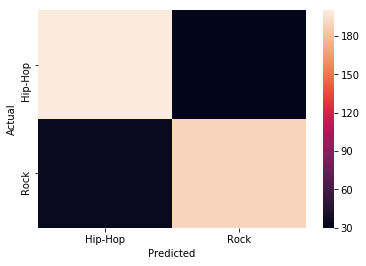

             precision    recall  f1-score   support

    Hip-Hop       0.85      0.87      0.86       230
       Rock       0.86      0.84      0.85       225

avg / total       0.86      0.86      0.86       455



In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Training our K-neighbors classifier on the balanced data
knn = KNeighborsClassifier()
knn.fit(train_features,train_labels)
pred_labels_knn = knn.predict(test_features)

print("K-Neighbors Classifier")
#print(confusion_matrix(test_labels, pred_labels_tree))
sns.heatmap(confusion_matrix(test_labels, pred_labels_knn),xticklabels=genres,yticklabels=genres)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Creating classification report
print(classification_report(test_labels,pred_labels_knn))

Naive Bayes: 



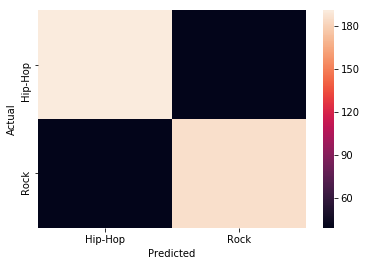

             precision    recall  f1-score   support

    Hip-Hop       0.83      0.83      0.83       230
       Rock       0.83      0.83      0.83       225

avg / total       0.83      0.83      0.83       455



In [37]:
from sklearn.naive_bayes import GaussianNB

# Training our Naive_Bayes on the balanced data
nabay = GaussianNB()
nabay.fit(train_features,train_labels)
pred_labels_nb = nabay.predict(test_features)

print("Naive Bayes: \n")
#print(confusion_matrix(test_labels, pred_labels_tree))
sns.heatmap(confusion_matrix(test_labels, pred_labels_nb),xticklabels=genres,yticklabels=genres)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Creating classification report
print(classification_report(test_labels,pred_labels_nb))

In [38]:
from sklearn.model_selection import KFold, cross_val_score

# Setting our K-fold cross-validation
kf = KFold(n_splits=10,random_state=10)

In [39]:
#Training the model using KFold cv
tree = DecisionTreeClassifier(random_state=10)
tree_score = cross_val_score(tree,pca_projection,labels,cv=kf)

In [40]:
logreg = LogisticRegression(random_state=10)
logit_score = cross_val_score(logreg,pca_projection,labels,cv=kf)

In [41]:
rfc = RandomForestClassifier(random_state=10)
rfc_score = cross_val_score(rfc,pca_projection,labels,cv=kf)

In [42]:
svm = SVC(random_state=10)
svm_score = cross_val_score(svm,pca_projection,labels,cv=kf)

In [43]:
knn = KNeighborsClassifier()
knn_score = cross_val_score(knn,pca_projection,labels,cv=kf)

In [44]:
nabay = GaussianNB()
nabay_score = cross_val_score(nabay,pca_projection,labels,cv=kf)

In [45]:
# Printing the mean of each array of scores
print("Decision Tree:         ", np.mean(tree_score),"\n")
print("Logistic Regression:   ", np.mean(logit_score),"\n")
print("Random Forest:         ", np.mean(rfc_score),"\n")
print("Support Vector Machine:", np.mean(svm_score),"\n")
print("K-Neighbors:           ", np.mean(knn_score),"\n")
print("Naive Bayes:           ", np.mean(nabay_score),"\n")


Decision Tree:          0.7241758241758242 

Logistic Regression:    0.7752747252747252 

Random Forest:          0.7862637362637361 

Support Vector Machine: 0.8137362637362637 

K-Neighbors:            0.817032967032967 

Naive Bayes:            0.7846153846153846 



In [ ]:
#Hence, we find that 
#K-Neighbors Classifier and Support Vector Machine
#are the strongest predictors here.
